In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic
import pandas as pd
import numpy as np
import os
import re
from tqdm import tqdm
tqdm.pandas()
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
from matplotlib.colors import LinearSegmentedColormap

# Geopandas 관련 버전 에러 방지
os.environ['USE_PYGEOS'] = '0'

# Load the shp file
import geopandas as gpd

In [ ]:
# Load for convert lat/long to geometry
from geopy.geocoders import Nominatim
import urllib
from urllib import parse
from urllib.request import urlopen
from urllib.request import Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import requests
import json
import time

In [ ]:
# Load for regression
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Load for feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
! pip install ahpy

In [ ]:
# Load for AHP
from scipy.stats.mstats import gmean
import ahpy

## Data loading

In [ ]:
os.chdir('/content/drive/MyDrive/2. 데이터 분석(Python)/Data')

In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1UInkOZo4OULeCnCY3IAEiSVNqWiundgF/2. 데이터 분석(Python)/Data'

In [ ]:
path = "./"
os.listdir(path)

['서울시 상권분석서비스(점포-행정동)_2020년.csv',
 '서울시 상권분석서비스(점포-행정동)_2021년.csv',
 '서울시 상권분석서비스(점포-행정동)_2022년.csv',
 '소상공인시장진흥공단_상가(상권)정보_서울_202312.csv',
 '서울시 상권분석서비스(직장인구-행정동).csv',
 '서울시 상권분석서비스(상주인구-행정동).csv',
 '서울시 상권분석서비스(집객시설-행정동).csv',
 '서울시 광진구 안심이 CCTV 연계 현황.csv',
 '서울시 버스정류소 위치정보.csv',
 '서울교통공사 지하철역 주소 및 전화번호 정보.csv',
 '경찰청_경찰관서 위치 주소 현황_20230811.csv',
 '서울시 자치구별 도보 네트워크 공간정보.csv',
 '서울시 상권분석서비스(점포-행정동)_2023년.csv',
 '서울시 상권분석서비스(영역-행정동)',
 '서울시 상권분석서비스(영역-상권)',
 'processed_data.pkl',
 '서울_공시지가_shp',
 '광진구_공시지가_shp',
 '서울시 병의원 위치 정보.csv',
 '서울시 약국 인허가 정보.csv',
 'skorea-submunic

In [ ]:
csv_dict = {} # shp 파일을 제외한 모든 csv 파일은 해당 딕녀너리에 저장, 한글 key값 에러로 숫자로 대체
n = 0

for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_dict[n] = pd.read_csv(path + file, encoding = "cp949", encoding_errors="ignore")
        n += 1

<ipython-input-11-f74121554700>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_dict[n] = pd.read_csv(path + file, encoding = "cp949", encoding_errors="ignore")


## Data loading for processing

In [ ]:
# os.chdir('/content/drive/MyDrive/2. 데이터 분석(Python)')

In [ ]:
# os.getcwd()

In [ ]:
# path = "./"
# os.listdir(path)

In [ ]:
# csv_dict = {} # shp 파일을 제외한 모든 csv 파일은 해당 딕녀너리에 저장, 한글 key값 에러로 숫자로 대체
# n = 0

# for file in os.listdir(path):
#     if file.endswith(".csv"):
#         csv_dict[n] = pd.read_csv(path + file, encoding = "UTF-8", encoding_errors="ignore")
#         n += 1

In [ ]:
# gwangjin_all = csv_dict[1].copy()
# gwangjin_all = gwangjin_all.drop(columns = ["Unnamed: 0"])
# gwangjin_all

In [ ]:
# csv_dict = {} # shp 파일을 제외한 모든 csv 파일은 해당 딕녀너리에 저장, 한글 key값 에러로 숫자로 대체
# n = 0

# for file in os.listdir(path):
#     if file.endswith(".csv"):
#         csv_dict[n] = pd.read_csv(path + file, encoding = "cp949", encoding_errors="ignore")
#         n += 1

In [ ]:
# gwangjin_xy = csv_dict[3].copy()
# gwangjin_xy

## Data Processing

In [ ]:
# gwangjin_xy = gwangjin_xy[["읍면동명", "X", "Y"]]
# gwangjin_xy["읍면동명"] = gwangjin_xy["읍면동명"].str.replace("제", "")
# gwangjin_xy

In [ ]:
# merged_df = pd.merge(gwangjin_all, gwangjin_xy, how='inner', left_on='ADSTRD_NM', right_on='읍면동명')
# merged_df = merged_df.drop(columns = ["읍면동명"])
# merged_df

In [ ]:
# merged_df.to_csv("gwangjin_all_xy.csv")

## 변수 상관관계 분석

In [ ]:
with open(f'./processed_data.pkl', 'rb') as f: #
    data_dict = pickle.load(f)

In [ ]:
with open(f'./mclp_shp.pkl', 'rb') as f: #
    mclp_shp = pickle.load(f)

In [ ]:
gwangjin_market = mclp_shp["market_gwangjin"].copy()
gwangjin_medi = mclp_shp["medi_gwangjin"].copy()
gwangjin_pharm = mclp_shp["gwangjin_pharm"].copy()

In [ ]:
gwangjin_subway = data_dict["subway"].copy()
gwangjin_bus = data_dict["bus"].copy()
gwangjin_cctv = data_dict["cctv"].copy()
gwangjin_police = data_dict["police"].copy()

In [ ]:
gwangjin_admin = data_dict["gwangjin_admin"].copy()

In [ ]:
gwangjin_admin.head()

,ADSTRD_CD,ADSTRD_NM,XCNTS_VALU,YDNTS_VALU,RELM_AR,geometry
58,11215840,자양3동,206277.0,447988.0,1196419.0,"POLYGON ((206502.191 448833.470, 206557.876 44..."
59,11215847,자양4동,205623.0,448252.0,1180023.0,"POLYGON ((206164.104 448956.578, 206210.110 44..."
60,11215850,구의1동,207599.0,449114.0,565313.0,"POLYGON ((207972.337 449261.113, 207965.893 44..."
61,11215860,구의2동,208382.0,450180.0,1388041.0,"POLYGON ((209270.675 450767.066, 209269.698 45..."
62,11215870,구의3동,208328.0,448610.0,1027561.0,"POLYGON ((208172.878 449404.420, 208188.854 44..."


In [ ]:
df_dict = {
    "market": gwangjin_market,
    "medi": gwangjin_medi,
    "pharm": gwangjin_pharm,
    "subway": gwangjin_subway,
    "bus": gwangjin_bus,
    "cctv": gwangjin_cctv,
    "police": gwangjin_police
    }
gwangjin_df = pd.DataFrame(gwangjin_admin["ADSTRD_NM"])

In [ ]:
for key, value in df_dict.items():
  value = gpd.sjoin(value, gwangjin_admin, how="inner", op="intersects")
  value = pd.DataFrame(value["ADSTRD_NM"])
  counts = value["ADSTRD_NM"].value_counts().reset_index()
  counts.columns = ["ADSTRD_NM", key]
  gwangjin_df = pd.merge(gwangjin_df, counts, on="ADSTRD_NM", how="left")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate

In [ ]:
gwangjin_df = gwangjin_df.fillna(0)
gwangjin_df = gwangjin_df.astype({"subway": int, "police": int})
gwangjin_df

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police
0,자양3동,38,34,10,0,18,217,1
1,자양4동,63,52,16,1,12,282,1
2,구의1동,46,34,12,1,13,286,0
3,구의2동,41,35,10,0,20,317,1
4,구의3동,55,61,15,1,23,277,0
5,화양동,90,66,13,2,21,306,1
6,군자동,50,41,9,0,22,311,0
7,중곡1동,37,36,15,2,18,181,1
8,중곡2동,47,52,13,0,17,237,1
9,중곡3동,37,26,8,1,21,311,1


In [ ]:
gwangjin_live = csv_dict[5].copy()
gwangjin_work = csv_dict[4].copy()

In [ ]:
gwangjin_live.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
0,20191,11110515,청운효자동,13047,6111,6936,2248,1648,1879,2304,...,1235,1052,821,1020,1283,1062,1698,5384,314,5070
1,20191,11110530,사직동,9224,4169,5055,1387,1095,1383,1558,...,1021,697,603,781,856,810,1308,4352,163,4189
2,20191,11110540,삼청동,2831,1344,1487,340,336,422,399,...,383,156,171,220,201,253,486,1413,0,1413
3,20191,11110550,부암동,10055,4850,5205,1490,1394,1277,1647,...,1137,689,633,672,905,909,1397,4243,74,4169
4,20191,11110560,평창동,18615,8775,9840,3018,2691,2303,2848,...,1976,1472,1272,1231,1592,1757,2516,7463,459,7004


In [ ]:
gwangjin_live = gwangjin_live[["기준_년분기_코드", "행정동_코드_명", "연령대_20_상주인구_수", "연령대_30_상주인구_수"]]
gwangjin_live["2030_live"] = gwangjin_live["연령대_20_상주인구_수"] + gwangjin_live["연령대_30_상주인구_수"]
gwangjin_live = gwangjin_live.rename(columns = {"행정동_코드_명": "ADSTRD_NM"})
gwangjin_live = gwangjin_live.astype({"기준_년분기_코드": str})
gwangjin_live = gwangjin_live[gwangjin_live["기준_년분기_코드"] == "20191"]
gwangjin_live = gwangjin_live[["ADSTRD_NM", "2030_live"]]
gwangjin_live = gwangjin_live[gwangjin_live["ADSTRD_NM"].isin(gwangjin_admin["ADSTRD_NM"].unique())]
gwangjin_live

,ADSTRD_NM,2030_live
65,화양동,12530
66,군자동,7798
67,중곡1동,5698
68,중곡2동,7832
69,중곡3동,5753
70,중곡4동,9479
71,능동,5024
72,광장동,8298
73,자양1동,8089
74,자양2동,8568


In [ ]:
gwangjin_work = gwangjin_work[["기준_년분기_코드", "행정동_코드_명", "연령대_20_직장_인구_수", "연령대_30_직장_인구_수"]]
gwangjin_work["2030_work"] = gwangjin_work["연령대_20_직장_인구_수"] + gwangjin_work["연령대_30_직장_인구_수"]
gwangjin_work = gwangjin_work.rename(columns = {"행정동_코드_명": "ADSTRD_NM"})
gwangjin_work = gwangjin_work.astype({"기준_년분기_코드": str})
gwangjin_work = gwangjin_work[gwangjin_work["기준_년분기_코드"] == "20191"]
gwangjin_work = gwangjin_work[["ADSTRD_NM", "2030_work"]]
gwangjin_work = gwangjin_work[gwangjin_work["ADSTRD_NM"].isin(gwangjin_admin["ADSTRD_NM"].unique())]
gwangjin_work

,ADSTRD_NM,2030_work
7,자양1동,2647
55,구의1동,1680
115,자양4동,1174
116,중곡4동,783
117,화양동,4307
174,자양3동,1245
224,구의2동,1087
225,군자동,2868
226,중곡2동,1348
328,광장동,4018


In [ ]:
gwangjin_df = pd.merge(gwangjin_df, gwangjin_live, on="ADSTRD_NM", how="left")
gwangjin_df = pd.merge(gwangjin_df, gwangjin_work, on="ADSTRD_NM", how="left")
gwangjin_df

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_live,2030_work
0,자양3동,38,34,10,0,18,217,1,9155,1245
1,자양4동,63,52,16,1,12,282,1,5776,1174
2,구의1동,46,34,12,1,13,286,0,8970,1680
3,구의2동,41,35,10,0,20,317,1,7442,1087
4,구의3동,55,61,15,1,23,277,0,9772,4488
5,화양동,90,66,13,2,21,306,1,12530,4307
6,군자동,50,41,9,0,22,311,0,7798,2868
7,중곡1동,37,36,15,2,18,181,1,5698,1224
8,중곡2동,47,52,13,0,17,237,1,7832,1348
9,중곡3동,37,26,8,1,21,311,1,5753,823


In [ ]:
csv_dict = {} # shp 파일을 제외한 모든 csv 파일은 해당 딕녀너리에 저장, 한글 key값 에러로 숫자로 대체
n = 0

for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_dict[n] = pd.read_csv(path + file, encoding = "UTF-8", encoding_errors="ignore")
        n += 1

<ipython-input-26-344df0c339d0>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_dict[n] = pd.read_csv(path + file, encoding = "UTF-8", encoding_errors="ignore")
<ipython-input-26-344df0c339d0>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_dict[n] = pd.read_csv(path + file, encoding = "UTF-8", encoding_errors="ignore")


In [ ]:
gwangjin_price = csv_dict[18].copy()
gwangjin_price = gwangjin_price.drop(columns = ["Unnamed: 0"])
gwangjin_price = gwangjin_price.rename(columns = {"행정동_코드_명": "ADSTRD_NM", "A16": "price"})
gwangjin_price

,ADSTRD_NM,price
0,광장동,3.120248e+06
1,구의1동,5.097641e+06
2,구의2동,3.992288e+06
3,구의3동,4.555185e+06
4,군자동,4.379572e+06
5,능동,4.494492e+06
6,자양1동,5.306388e+06
7,자양2동,5.424711e+06
8,자양3동,4.914815e+06
9,자양4동,5.588464e+06


In [ ]:
gwangjin_df = pd.merge(gwangjin_df, gwangjin_price, on="ADSTRD_NM", how="left")
gwangjin_df

,ADSTRD_NM,market,medi,pharm,subway,bus,cctv,police,2030_live,2030_work,price
0,자양3동,38,34,10,0,18,217,1,9155,1245,4.914815e+06
1,자양4동,63,52,16,1,12,282,1,5776,1174,5.588464e+06
2,구의1동,46,34,12,1,13,286,0,8970,1680,5.097641e+06
3,구의2동,41,35,10,0,20,317,1,7442,1087,3.992288e+06
4,구의3동,55,61,15,1,23,277,0,9772,4488,4.555185e+06
5,화양동,90,66,13,2,21,306,1,12530,4307,5.109441e+06
6,군자동,50,41,9,0,22,311,0,7798,2868,4.379572e+06
7,중곡1동,37,36,15,2,18,181,1,5698,1224,4.197939e+06
8,중곡2동,47,52,13,0,17,237,1,7832,1348,4.363943e+06
9,중곡3동,37,26,8,1,21,311,1,5753,823,4.004658e+06


In [ ]:
gwangjin_all = gwangjin_df[gwangjin_df.columns.difference(["ADSTRD_NM"])]
corr = gwangjin_all.corr(method="pearson")
corr

,2030_live,2030_work,bus,cctv,market,medi,pharm,police,price,subway
2030_live,1.000000,0.577618,0.357142,0.374806,0.619839,0.473523,0.073310,-0.005313,0.120446,-0.140623
2030_work,0.577618,1.000000,0.355539,0.188110,0.509406,0.564742,0.255349,-0.186283,-0.022243,0.264238
bus,0.357142,0.355539,1.000000,0.498353,0.015701,-0.156054,-0.375699,0.297898,-0.787840,-0.137833
cctv,0.374806,0.188110,0.498353,1.000000,0.367247,0.004362,-0.325710,-0.002219,-0.242555,-0.280847
market,0.619839,0.509406,0.015701,0.367247,1.000000,0.689982,0.385175,0.096066,0.370786,0.285864
medi,0.473523,0.564742,-0.156054,0.004362,0.689982,1.000000,0.800962,0.154396,0.470053,0.010060
pharm,0.073310,0.255349,-0.375699,-0.325710,0.385175,0.800962,1.000000,0.212302,0.521932,0.150434
police,-0.005313,-0.186283,0.297898,-0.002219,0.096066,0.154396,0.212302,1.000000,-0.260848,-0.061085
price,0.120446,-0.022243,-0.787840,-0.242555,0.370786,0.470053,0.521932,-0.260848,1.000000,0.009039
subway,-0.140623,0.264238,-0.137833,-0.280847,0.285864,0.010060,0.150434,-0.061085,0.009039,1.000000


In [ ]:
# os.chdir('/content/drive/MyDrive/2. 데이터 분석(Python)')
# gwangjin_df.to_csv("gwangjin_all.csv")

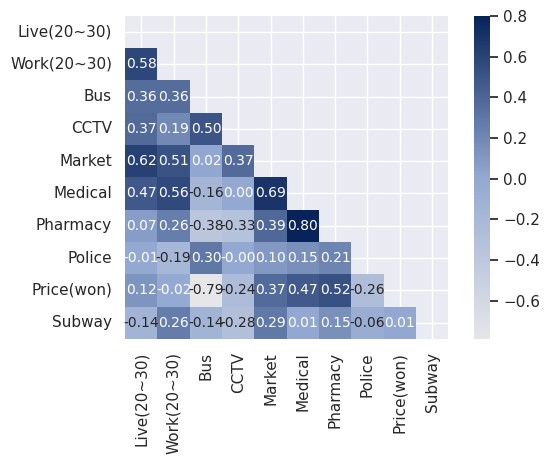

In [ ]:
column_names = ["Live(20~30)", "Work(20~30)", "Bus", "CCTV", "Market", "Medical", "Pharmacy", "Police", "Price(won)", "Subway"]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

colors = [
    mcl.hsv_to_rgb((240/360, 0.01, 0.91)),
    mcl.hsv_to_rgb((219/360, 0.3, 0.82)),
    mcl.hsv_to_rgb((220/360, 0.92, 0.35))
]
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

sns.set(font_scale=1.0)
hm = sns.heatmap(corr.values,
            cmap=cmap,
            mask=mask,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=column_names,
            xticklabels=column_names)

plt.tight_layout()
plt.show()

## 변수 선택 분석

In [ ]:
gwangjin_feature = gwangjin_all[gwangjin_all.columns.difference(["2030_live", "2030_work"])]

In [ ]:
# 상주인구 다중회귀분석: R2값 높음
model = sm.OLS(gwangjin_all["2030_live"], gwangjin_feature)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              2030_live   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              60.33
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    9.06e-06
Time:                        08:56:00   Log-Likelihood:                         -124.66
No. Observations:                  15   AIC:                                      265.3
Df Residuals:                       7   BIC:                                      271.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# 직장인구 다중회귀분석: R2값 높음
model = sm.OLS(gwangjin_all["2030_work"], gwangjin_feature)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              2030_work   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              18.23
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    0.000494
Time:                        08:56:01   Log-Likelihood:                         -114.82
No. Observations:                  15   AIC:                                      245.6
Df Residuals:                       7   BIC:                                      251.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# VIF(Variance Inflation Factors): 10 넘으면 다중공선성 있음
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(gwangjin_feature.values, i) for i in range(gwangjin_feature.shape[1])]
vif["features"] = gwangjin_feature.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,3.586552,subway
1,4.258703,police
2,19.540510,bus
3,60.926310,market
4,62.150431,price
5,71.885092,pharm
6,84.416488,medi
7,85.342496,cctv


In [ ]:
# PCA(Principal Component Analysis): 주성분분석
x = StandardScaler().fit_transform(gwangjin_feature)
features = gwangjin_feature.columns
pd.DataFrame(x, columns=features).head()

,bus,cctv,market,medi,pharm,police,price,subway
0,-0.206164,-1.281900,-0.645327,-0.538594,-0.360288,0.707107,0.549595,-0.950255
1,-1.012893,0.247907,1.174204,0.771499,1.441153,0.707107,1.527377,0.345547
2,-0.878438,0.342049,-0.063077,-0.538594,0.240192,-1.414214,0.814962,0.345547
3,0.062746,1.071650,-0.426983,-0.465811,-0.360288,0.707107,-0.789426,-0.950255
4,0.466110,0.130230,0.591954,1.426546,1.140913,-1.414214,0.027603,0.345547


In [ ]:
pca = PCA()
pca.fit(x)
PC_score = pca.transform(x)
pca.components_

array([[ 0.38320438,  0.196112  , -0.32797388, -0.45887913, -0.4924611 ,
         0.02103504, -0.48223268, -0.14508203],
       [-0.46496895, -0.48896173, -0.47926963, -0.36263743, -0.12085804,
        -0.35775035,  0.18818576,  0.07422373],
       [ 0.12611388, -0.52045778, -0.21648384,  0.00747105,  0.2740545 ,
         0.63450059, -0.31382191,  0.30019469],
       [-0.07151329, -0.02857107, -0.33344484,  0.13446489,  0.16697045,
         0.27618517,  0.13131563, -0.86220769],
       [ 0.39445193, -0.22056864, -0.21153417,  0.37702678,  0.33389613,
        -0.61499176, -0.33829798, -0.06866033],
       [ 0.28059094, -0.61023099,  0.40439323,  0.15373113, -0.53640617,
        -0.00445363,  0.16590954, -0.21550482],
       [-0.59734641,  0.01297984,  0.0646517 ,  0.43518305, -0.31466581,
         0.01608322, -0.58932406, -0.05355901],
       [ 0.15745817,  0.17193906, -0.54057618,  0.53349852, -0.37637431,
         0.119204  ,  0.3564203 ,  0.29308353]])

,pc_ratio
PC1,0.371408
PC2,0.236370
PC3,0.152735
PC4,0.134663
PC5,0.060119
PC6,0.025853
PC7,0.013202
PC8,0.005650


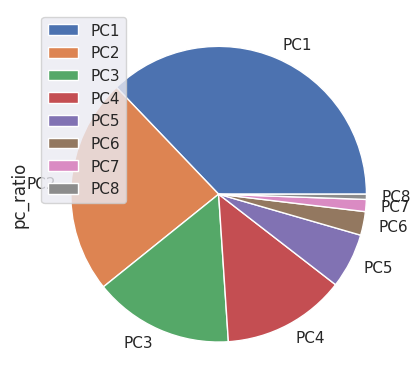

In [ ]:
ratio = pca.explained_variance_ratio_
pca_df = pd.DataFrame(ratio, index = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"], columns = ["pc_ratio"])
pca_df.plot.pie(y = "pc_ratio")
pca_df

In [ ]:
# 통계 기반 변수 선택: 중요하지 않다고 판단된 변수는 결과에서 제외
X = gwangjin_feature
y = gwangjin_all[['2030_live']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

f_select = SelectKBest(chi2, k="all")
f_select.fit(X_train, y_train)
f_scores = pd.DataFrame()

f_scores['chi'] = f_select.scores_
f_scores['p'] = f_select.pvalues_
f_scores['support'] = f_select.get_support()
f_scores['attribute'] = X_train.columns
f_scores[f_scores['support'] == True]
f_scores

,chi,p,support,attribute
0,3.526214e+01,5.356122e-05,True,bus
1,8.403498e+01,2.542143e-14,True,cctv
2,5.185408e+01,4.816786e-08,True,market
3,5.391169e+01,1.962216e-08,True,medi
4,1.003509e+01,3.476521e-01,True,pharm
5,3.000000e+00,9.642950e-01,True,police
6,1.077126e+06,0.000000e+00,True,price
7,7.666667e+00,5.680554e-01,True,subway


In [ ]:
# f_scores.to_csv("gwangjin_fscores.csv")

In [ ]:
# 통계 기반 변수 선택: 중요하지 않다고 판단된 변수는 결과에서 제외
X = gwangjin_feature
y = gwangjin_all[['2030_work']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

f_select = SelectKBest(chi2, k="all")
f_select.fit(X_train, y_train)
f_scores = pd.DataFrame()

f_scores['chi'] = f_select.scores_
f_scores['p'] = f_select.pvalues_
f_scores['support'] = f_select.get_support()
f_scores['attribute'] = X_train.columns
f_scores[f_scores['support'] == True]
f_scores

,chi,p,support,attribute
0,3.526214e+01,5.356122e-05,True,bus
1,8.403498e+01,2.542143e-14,True,cctv
2,5.185408e+01,4.816786e-08,True,market
3,5.391169e+01,1.962216e-08,True,medi
4,1.003509e+01,3.476521e-01,True,pharm
5,3.000000e+00,9.642950e-01,True,police
6,1.077126e+06,0.000000e+00,True,price
7,7.666667e+00,5.680554e-01,True,subway


## 요소가 5개인 경우의 AHP 분석

In [ ]:
gwangjin_AHP = gwangjin_feature[["bus", "cctv", "market", "price"]]
gwangjin_AHP["medical"] = gwangjin_feature["medi"] + gwangjin_feature["pharm"]
gwangjin_AHP = gwangjin_AHP[["market", "medical", "bus", "cctv", "price"]]
gwangjin_AHP

<ipython-input-181-9b85bc4362eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_AHP["medical"] = gwangjin_feature["medi"] + gwangjin_feature["pharm"]


,market,medical,bus,cctv,price
0,38,44,18,217,4914814.828
1,63,68,12,282,5588464.160
2,46,46,13,286,5097641.286
3,41,45,20,317,3992287.797
4,55,76,23,277,4555185.217
5,90,79,21,306,5109440.911
6,50,50,22,311,4379571.617
7,37,51,18,181,4197938.820
8,47,65,17,237,4363943.387
9,37,34,21,311,4004658.182


In [ ]:
gwangjin_comparisons = {
    ('market', 'medical'): 3, ('market', 'bus'): 3/13, ('market', 'cctv'): 3/2, ('market', 'price'): 3/5,
     ('medical', 'bus'): 1/13, ('medical', 'cctv'): 1/2, ('medical', 'price'): 1/5,
      ('bus', 'cctv'): 13/2, ('bus', 'price'): 13/5,
       ('cctv', 'price'): 2/5
}

gwangjin = ahpy.Compare(name='Gwangjin', comparisons=gwangjin_comparisons, precision=3, random_index='saaty')

print("weights: ", gwangjin.target_weights)
print("consistency ratio: ", gwangjin.consistency_ratio)

weights:  {'bus': 0.542, 'price': 0.208, 'market': 0.125, 'cctv': 0.083, 'medical': 0.042}
consistency ratio:  0.0


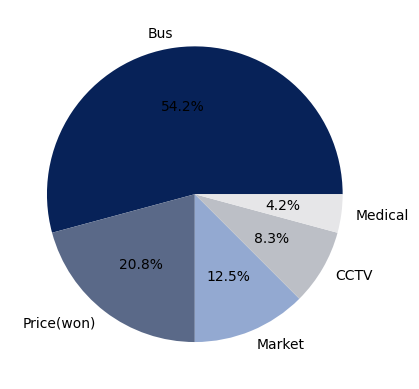

In [ ]:
ratio = [0.542, 0.208, 0.125, 0.083, 0.042]
labels = ["Bus", "Price(won)", "Market", "CCTV", "Medical"]
colors = ["#072258", "#5A6988", "#93A9D1", "#BCBFC6", "#E6E6E8"]
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.show()